<a href="https://colab.research.google.com/github/NapoliD/Rappi/blob/main/Solucion_Rappi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INICIAMOS SESION EN REPOSITORIO

In [337]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [338]:
import os
os.chdir('/content/drive/My Drive/')

In [339]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
import seaborn as sns
import statistics


Antes de sumergirnos en el entrenamiento de modelos de aprendizaje automático, primero debemos mirar la distribución de la información disponible.

In [340]:
data = pd.read_csv('test_challenge.csv',encoding='utf-8',decimal='.',thousands=',')
data1 = pd.read_csv('train_challenge.csv',encoding='utf-8',decimal='.',thousands=',')

data.shape

(913, 4)

In [341]:
#test_challenge
data.head(5)


,name,description,maker,trademark
0,Queso Sancor Gouda 280 Gr,Queso Sancor Gouda 280 Gr,NaN,Sancor
1,Jugo De Limón Delemon 1 L,Jugo De Limón Delemon 1 L,NaN,Delemon
2,Turrón Georgalos De Yema,Turrón Georgalos De Yema,NaN,Georgalos
3,Ketchup Danica X220Gr.Dp,Ketchup Danica X220Gr.Dp,NaN,La Gallega
4,Queso Reggianito La Paulina Trozado Paquete 1 Kg,Queso Reggianito La Paulina Trozado Paquete 1 Kg,NaN,La Paulina


In [342]:
#train_challenge
data1.head(5)


,name,description,maker,trademark
0,Cerveza Otro Mundo 500 Ml,Cerveza Otro Mundo 500 Ml,NaN,Otro Mundo
1,Vino San Telmo Varietales X750Ml.,Vino San Telmo Varietales X750Ml.,NaN,San Telmo
2,Mayonesa Natura 1000cc,Mayonesa Natura con jugo de limon sachet x 100...,gallega,Natura
3,Brahma Chopp 354cc x 6,Brahma Chopp 354cc x 6,NaN,Brahma
4,Mayonesa HellmannS Light Doypack 237 Gr,Mayonesa HellmannS Light Doypack 237 Gr,NaN,Hellmann´S


In [343]:
data['name'].apply(lambda x: len(x.split(' '))).sum()

5842

# LIMPIAMOS DATA

Procedo con la primer limpieza de datos, y la creación de nuevas columnas para poder crear el dataset de entrenamiento, tambien se va aplicar Tokenizer para identificar los tipos de productos y agregaremos una columna que codifique el producto como un número entero porque las variables categóricas a menudo se representan mejor con números enteros que con cadenas. La estrategía para esta solucion es directamente utilizar el dataset, aplicar bag of word y luego entrenar el mismo para predecir las subcategorias que no identificamos, para armar el bag of word se utilizo el archivo train challenge. Es una solucion simple que tiene bajo consumo de recurso pero con alta efectividad.

In [344]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stops=set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [345]:
data['name_limp'] = data['name'].str.replace('?', ' ')
data['name_limp'] = data['name_limp'].str.replace('.', ' ')
data['name_limp'] = data['name_limp'].str.replace(',', ' ')
data['name_limp'] = data['name_limp'].str.replace('!', '')
#data['name_limp'] = data['name_limp'].str.replace('  ', '')
data['name_limp'] = data['name_limp'].str.replace('-', '')
data['name_limp'] = data['name_limp'].str.replace('\d+', '')
data['name_limp']= data['name_limp'].str.lower()

def del_stop_words(sentence):
  return " ".join([word for word in tokenizer.tokenize(sentence) if word not in stops])
data['tokens']=data['name_limp'].apply(del_stop_words)
data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(row['tokens']), axis=1)
data.head(10)




,name,description,maker,trademark,name_limp,tokens,tokenized_sents
0,Queso Sancor Gouda 280 Gr,Queso Sancor Gouda 280 Gr,NaN,Sancor,queso sancor gouda gr,queso sancor gouda gr,"[queso, sancor, gouda, gr]"
1,Jugo De Limón Delemon 1 L,Jugo De Limón Delemon 1 L,NaN,Delemon,jugo de limón delemon l,jugo limón delemon l,"[jugo, limón, delemon, l]"
2,Turrón Georgalos De Yema,Turrón Georgalos De Yema,NaN,Georgalos,turrón georgalos de yema,turrón georgalos yema,"[turrón, georgalos, yema]"
3,Ketchup Danica X220Gr.Dp,Ketchup Danica X220Gr.Dp,NaN,La Gallega,ketchup danica xgr dp,ketchup danica xgr dp,"[ketchup, danica, xgr, dp]"
4,Queso Reggianito La Paulina Trozado Paquete 1 Kg,Queso Reggianito La Paulina Trozado Paquete 1 Kg,NaN,La Paulina,queso reggianito la paulina trozado paquete kg,queso reggianito paulina trozado paquete kg,"[queso, reggianito, paulina, trozado, paquete,..."
5,Caramelos Pico Dulce 150 Gr,Caramelos Pico Dulce 150 Gr,NaN,Lheritier,caramelos pico dulce gr,caramelos pico dulce gr,"[caramelos, pico, dulce, gr]"
6,Chimichurri Hellmann'S 355 Gr,Chimichurri Hellmann'S 355 Gr,NaN,Hellmann´S,chimichurri hellmann's gr,chimichurri hellmann s gr,"[chimichurri, hellmann, s, gr]"
7,Vino Fino Ampakama Cabernet Sauvignon,Vino Tinto Fino Ampakama Intenso Cabernet Sauv...,NaN,Ampakama,vino fino ampakama cabernet sauvignon,vino fino ampakama cabernet sauvignon,"[vino, fino, ampakama, cabernet, sauvignon]"
8,Leche Entera Vit A C D B9 La Serenisima 1lt,LECHE ENTERA LA SERENISIMA ULT.CA.NAT. ACDyB9,gallega,La Serenisima,leche entera vit a c d b la serenisima lt,leche entera vit c d b serenisima lt,"[leche, entera, vit, c, d, b, serenisima, lt]"
9,Vino Blanco Frizze Evolution Ultra Blue 750 Cc,Vino Blanco Frizze Evolution Ultra Blue 750 Cc,Frizze,Frizze,vino blanco frizze evolution ultra blue cc,vino blanco frizze evolution ultra blue cc,"[vino, blanco, frizze, evolution, ultra, blue,..."


In [346]:
data2= pd.DataFrame(data.tokens.str.split(" ",expand=True,))
data3=pd.concat([data.reset_index(drop=True),
                      data2.reset_index(drop=True)], axis=1)
data3.head(5)

,name,description,maker,trademark,name_limp,tokens,tokenized_sents,0,1,2,3,4,5,6,7,8
0,Queso Sancor Gouda 280 Gr,Queso Sancor Gouda 280 Gr,NaN,Sancor,queso sancor gouda gr,queso sancor gouda gr,"[queso, sancor, gouda, gr]",queso,sancor,gouda,gr,None,None,None,None,None
1,Jugo De Limón Delemon 1 L,Jugo De Limón Delemon 1 L,NaN,Delemon,jugo de limón delemon l,jugo limón delemon l,"[jugo, limón, delemon, l]",jugo,limón,delemon,l,None,None,None,None,None
2,Turrón Georgalos De Yema,Turrón Georgalos De Yema,NaN,Georgalos,turrón georgalos de yema,turrón georgalos yema,"[turrón, georgalos, yema]",turrón,georgalos,yema,None,None,None,None,None,None
3,Ketchup Danica X220Gr.Dp,Ketchup Danica X220Gr.Dp,NaN,La Gallega,ketchup danica xgr dp,ketchup danica xgr dp,"[ketchup, danica, xgr, dp]",ketchup,danica,xgr,dp,None,None,None,None,None
4,Queso Reggianito La Paulina Trozado Paquete 1 Kg,Queso Reggianito La Paulina Trozado Paquete 1 Kg,NaN,La Paulina,queso reggianito la paulina trozado paquete kg,queso reggianito paulina trozado paquete kg,"[queso, reggianito, paulina, trozado, paquete,...",queso,reggianito,paulina,trozado,paquete,kg,None,None,None


In [347]:
data3.rename({0: "Producto",  
           1: "dos",  
           2: "tres"},  
          axis = "columns", inplace = True)

In [348]:
data3.head(2)

,name,description,maker,trademark,name_limp,tokens,tokenized_sents,Producto,dos,tres,3,4,5,6,7,8
0,Queso Sancor Gouda 280 Gr,Queso Sancor Gouda 280 Gr,NaN,Sancor,queso sancor gouda gr,queso sancor gouda gr,"[queso, sancor, gouda, gr]",queso,sancor,gouda,gr,None,None,None,None,None
1,Jugo De Limón Delemon 1 L,Jugo De Limón Delemon 1 L,NaN,Delemon,jugo de limón delemon l,jugo limón delemon l,"[jugo, limón, delemon, l]",jugo,limón,delemon,l,None,None,None,None,None


In [349]:
data3['Producto2']=data3['Producto']+' '+data3['dos']

In [350]:
data3.loc[:,['name','tokens','Producto2']].head(5)

,name,tokens,Producto2
0,Queso Sancor Gouda 280 Gr,queso sancor gouda gr,queso sancor
1,Jugo De Limón Delemon 1 L,jugo limón delemon l,jugo limón
2,Turrón Georgalos De Yema,turrón georgalos yema,turrón georgalos
3,Ketchup Danica X220Gr.Dp,ketchup danica xgr dp,ketchup danica
4,Queso Reggianito La Paulina Trozado Paquete 1 Kg,queso reggianito paulina trozado paquete kg,queso reggianito


# ARMAMOS BAG OF WORD

In [351]:
# Guia/rbol
#Almacén: ['Fiambres', 
# 'Panificados', 
# 'Salchichas', 
# 'Aderezos', 
# 'Aceites y Vinagres', 
# 'Golosinas y Chocolates'], 
#Bebidas: ['Jugos', 'Aguas'], 
#Bebidas alcohólicas: ['Vinos', 'Cervezas', 'Whiskies', 'Champagnes'], 
#Lacteos: ['Quesos', 'Leches', 'Yogures']

Distribución de la primer palabra de la descripción del producto. Estas distribuciones se utilizaron para identificar las que más se repiten y armar el bag od word.

In [352]:
ver=pd.DataFrame(data3.groupby(['Producto']).size().sort_values(ascending=False).reset_index(inplace=False))
ver.to_csv('arbol_productos.csv')
ver.head(10)

,Producto,0
0,vino,167
1,queso,99
2,jugo,61
3,cerveza,57
4,chocolate,47
5,agua,45
6,yogur,31
7,leche,24
8,champaña,23
9,aceite,22


Para armar el bag of word se utilizó el archivo **train_challenge.csv**

In [353]:
test_list = [['vino',	'queso',	'jugo',	'cerveza',	'agua',	'chocolate',	'yogur',	'leche',	'yogurt',	'aceite',	'champaña',	'pan',	'salsa',	'caramelos',	'alfajor',	'whisky',	'aderezo',	'huevo',	'gomitas',	'mayonesa',	'jamón',	'vinagre',	'salchichas',	'espumante',	'bebida',	'bombones',	'oblea',	'aceto',	'chicle',	'alfajores',	'mostaza',	'salame',	'confites',	'postre',	'limonada',	'pastillas',	'turrón',	'tableta',	'ketchup',	'mortadela',	'champagne',	'caramelo',	'salchicha',	'quilmes',	'rebozador',	'obleas',	'salamín',	'bocaditos',	'tostadas',	'chimichurri',	'chupetines',	'chicles',	'bon',	'salchichón',	'chocolates',	'turron',	'galletitas',	'jamon',	'dulce',	'quesitos',	'mini',	'soda',	'lomo',	'tabla',	'leberwurst',	'fórmula',	'fiambre',	'frizze',	'seremix',	'chocghirardelli',	'chupetín',	'bondiola',	'panceta',	'chupetin',	'yogurisimo',	'champa',	'almendras',	'gaseosa',	'bombón','chocolateafter','cubanitos'],
             ['Vino',	'Quesos',	'Jugos',	'Cervezas',	'Aguas',	'Golosinas y Chocolates',	'Yogures',	'Leches',	'Yogures',	'Aceites y Vinagres',	'Champagnes',	'Panificados',	'Aderezos',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Whiskies',	'Aderezos',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Aderezos',	'Fiambres',	'Aceites y Vinagres',	'Salchichas',	'Champagnes',	'Jugos',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Aceites y Vinagres',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Aderezos',	'Fiambres',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Jugos',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Aderezos',	'Fiambres',	'Champagnes',	'Golosinas y Chocolates',	'Salchichas',	'Cervezas',	'Panificados',	'Golosinas y Chocolates',	'Fiambres',	'Golosinas y Chocolates',	'Panificados',	'Aderezos',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Fiambres',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Fiambres',	'Golosinas y Chocolates',	'Quesos',	'Golosinas y Chocolates',	'Aguas',	'Fiambres',	'Fiambres',	'Fiambres',	'Leches',	'Fiambres',	'Vino',	'Leches',	'Golosinas y Chocolates',	'Golosinas y Chocolates',	'Fiambres',	'Fiambres',	'Golosinas y Chocolates',	'Yogures',	'Champagnes',	'Golosinas y Chocolates',	'Jugos','Golosinas y Chocolates','Golosinas y Chocolates','Golosinas y Chocolates']]

In [354]:
subcategorias=pd.DataFrame(test_list, index=['Producto', 'Subcategoria']).T
subcategorias.head(5)

,Producto,Subcategoria
0,vino,Vino
1,queso,Quesos
2,jugo,Jugos
3,cerveza,Cervezas
4,agua,Aguas


In [355]:
final = pd.merge(data3,
                 subcategorias,
                 on=['Producto'])
final.head(5)

,name,description,maker,trademark,name_limp,tokens,tokenized_sents,Producto,dos,tres,3,4,5,6,7,8,Producto2,Subcategoria
0,Queso Sancor Gouda 280 Gr,Queso Sancor Gouda 280 Gr,NaN,Sancor,queso sancor gouda gr,queso sancor gouda gr,"[queso, sancor, gouda, gr]",queso,sancor,gouda,gr,None,None,None,None,None,queso sancor,Quesos
1,Queso Reggianito La Paulina Trozado Paquete 1 Kg,Queso Reggianito La Paulina Trozado Paquete 1 Kg,NaN,La Paulina,queso reggianito la paulina trozado paquete kg,queso reggianito paulina trozado paquete kg,"[queso, reggianito, paulina, trozado, paquete,...",queso,reggianito,paulina,trozado,paquete,kg,None,None,None,queso reggianito,Quesos
2,Queso Mozzarella Verónica Trozado 1 Kg,Queso Mozzarella Verónica Trozado 1 Kg,Verónica,Verónica,queso mozzarella verónica trozado kg,queso mozzarella verónica trozado kg,"[queso, mozzarella, verónica, trozado, kg]",queso,mozzarella,verónica,trozado,kg,None,None,None,None,queso mozzarella,Quesos
3,Queso Untable Finlandia Light Balance La Seren...,Queso Untable Finlandia Light Balance La Seren...,NaN,Finlandia,queso untable finlandia light balance la seren...,queso untable finlandia light balance serenisi...,"[queso, untable, finlandia, light, balance, se...",queso,untable,finlandia,light,balance,serenisima,gr,None,None,queso untable,Quesos
4,Queso Azul Tremblay X100Gr.,Queso Azul Tremblay X100Gr.,NaN,La Gallega,queso azul tremblay xgr,queso azul tremblay xgr,"[queso, azul, tremblay, xgr]",queso,azul,tremblay,xgr,None,None,None,None,None,queso azul,Quesos


In [356]:
final.shape

(852, 18)

Preparamos el dataset para el entrenamiento.

In [357]:
data_predict = final.loc[:,['Subcategoria', 'Producto2']]
data_predict.head(10)

,Subcategoria,Producto2
0,Quesos,queso sancor
1,Quesos,queso reggianito
2,Quesos,queso mozzarella
3,Quesos,queso untable
4,Quesos,queso azul
5,Quesos,queso provolone
6,Quesos,queso cremosísimo
7,Quesos,queso fundido
8,Quesos,queso untable
9,Quesos,queso azul


Agregaremos una columna que codifique el producto como un número entero porque las variables categóricas a menudo se representan mejor con números enteros que con cadenas

In [358]:
data_predict['category_id'] = data_predict['Subcategoria'].factorize()[0]
from io import StringIO
category_id_df = data_predict[['Subcategoria', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Subcategoria']].values)
data_predict.head(2)

,Subcategoria,Producto2,category_id
0,Quesos,queso sancor,0
1,Quesos,queso reggianito,0


In [359]:
data_predict['Producto2']=data_predict['Producto2'].astype(str)
data_predict['Subcategoria']=data_predict['Subcategoria'].astype(str)
data_predict.dtypes

Subcategoria    object
Producto2       object
category_id      int64
dtype: object

Observamos la distribución de las Subcategorias en el dataset de entrenamiento.


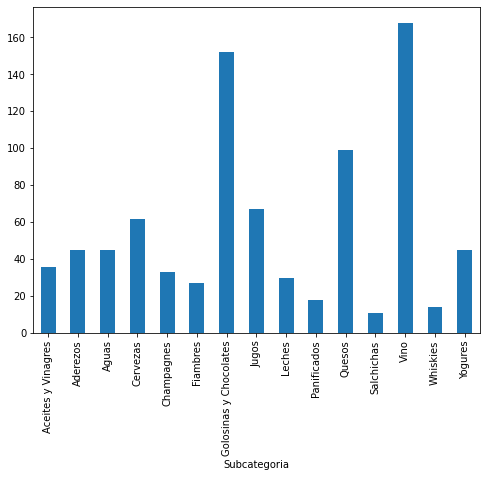

In [360]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data_predict.groupby('Subcategoria').Producto2.count().plot.bar(ylim=0)
plt.show()

# BIGRAMAS Y ENTRENAMIENTO

A continuación vamos a anlizar descripciónes vs subcategoría, cada una de las descripciones **X** está representada por **Y** características, que representan la puntuación tf-idf para diferentes unigramas y bigramas.

In [361]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2))

features = tfidf.fit_transform(data_predict.Producto2).toarray()
labels = data_predict.category_id
features.shape

(852, 99)

A continuación analizamos mediante unigramas y bigramas la relaccion de las subcategorias vs la descripciónes de los productos. Esta información puede graficarse o directamente observarla como vamos a proceder. 

In [362]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Aceites y Vinagres':
  . Most correlated unigrams:
       . oliva
       . aceite
  . Most correlated bigrams:
       . aceto balsámico
       . aceite oliva
# 'Aderezos':
  . Most correlated unigrams:
       . mayonesa
       . salsa
  . Most correlated bigrams:
       . vino blanco
       . vino tinto
# 'Aguas':
  . Most correlated unigrams:
       . saborizada
       . agua
  . Most correlated bigrams:
       . agua mineral
       . agua saborizada
# 'Cervezas':
  . Most correlated unigrams:
       . quilmes
       . cerveza
  . Most correlated bigrams:
       . vino tinto
       . cerveza heineken
# 'Champagnes':
  . Most correlated unigrams:
       . espumante
       . champaña
  . Most correlated bigrams:
       . vino tinto
       . champaña chandon
# 'Fiambres':
  . Most correlated unigrams:
       . cocido
       . jamón
  . Most correlated bigrams:
       . vino tinto
       . jamón cocido
# 'Golosinas y Chocolates':
  . Most correlated unigrams:
       . caramelos
       

Aplicamos el modelo predictivo, para que aprenda de las subcategorías ya identificadas anteriormente.

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(data_predict['Producto2'], data_predict['Subcategoria'], test_size = 0.1, random_state = 123)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#clf = MultinomialNB().fit(X_train_tfidf, y_train)
clf = LinearSVC().fit(X_train_tfidf, y_train)

Realizamos algunas pruebas para ver la calidad de las predicciónes.

In [364]:
data3['Producto2'].head(5)

0        queso sancor
1          jugo limón
2    turrón georgalos
3      ketchup danica
4    queso reggianito
Name: Producto2, dtype: object

Al eliminar parte de las descripción la prediccion funcióna bastante bien

In [365]:
print(clf.predict(count_vect.transform(["turr georgalos"])))

['Golosinas y Chocolates']


In [376]:
print(clf.predict(count_vect.transform(["ketchup da"])))

['Aderezos']


In [383]:
print(clf.predict(count_vect.transform(["queso rego"])))

['Quesos']


In [368]:
print(clf.predict(count_vect.transform(["limon jugo"])))

['Jugos']


Procedemos a predecir todo el dataset con nombre original **test_challenge.csv** 

In [384]:
predict_data=data3['Producto2'].astype(str)

In [385]:
prediccion=pd.DataFrame(clf.predict(count_vect.transform(predict_data)))
prediccion.rename({0: "Subcategoría"},  
          axis = "columns", inplace = True)
prediccion.head(10)


,Subcategoría
0,Quesos
1,Jugos
2,Golosinas y Chocolates
3,Aderezos
4,Quesos
5,Golosinas y Chocolates
6,Aderezos
7,Vino
8,Leches
9,Vino


Organizamos los datasets y guardamos el resultado con nombre **"test_challenge_Predict.csv"** para poder utilizarlo, el mismo se va a guardar en donde tengamos configurado nuestro entorno.

In [386]:
base_final=pd.concat([data3.loc[:,['name','description','maker','trademark','Producto2']].reset_index(drop=True),
                      prediccion.reset_index(drop=True)], axis=1)

base_final.to_csv('test_challenge_Predict.csv')
base_final.head(40)

,name,description,maker,trademark,Producto2,Subcategoría
0,Queso Sancor Gouda 280 Gr,Queso Sancor Gouda 280 Gr,NaN,Sancor,queso sancor,Quesos
1,Jugo De Limón Delemon 1 L,Jugo De Limón Delemon 1 L,NaN,Delemon,jugo limón,Jugos
2,Turrón Georgalos De Yema,Turrón Georgalos De Yema,NaN,Georgalos,turrón georgalos,Golosinas y Chocolates
3,Ketchup Danica X220Gr.Dp,Ketchup Danica X220Gr.Dp,NaN,La Gallega,ketchup danica,Aderezos
4,Queso Reggianito La Paulina Trozado Paquete 1 Kg,Queso Reggianito La Paulina Trozado Paquete 1 Kg,NaN,La Paulina,queso reggianito,Quesos
5,Caramelos Pico Dulce 150 Gr,Caramelos Pico Dulce 150 Gr,NaN,Lheritier,caramelos pico,Golosinas y Chocolates
6,Chimichurri Hellmann'S 355 Gr,Chimichurri Hellmann'S 355 Gr,NaN,Hellmann´S,chimichurri hellmann,Aderezos
7,Vino Fino Ampakama Cabernet Sauvignon,Vino Tinto Fino Ampakama Intenso Cabernet Sauv...,NaN,Ampakama,vino fino,Vino
8,Leche Entera Vit A C D B9 La Serenisima 1lt,LECHE ENTERA LA SERENISIMA ULT.CA.NAT. ACDyB9,gallega,La Serenisima,leche entera,Leches
9,Vino Blanco Frizze Evolution Ultra Blue 750 Cc,Vino Blanco Frizze Evolution Ultra Blue 750 Cc,Frizze,Frizze,vino blanco,Vino


El algoritmo MultinomialNB funció bien, pero vamos a verificar y comparar vs otros 3.

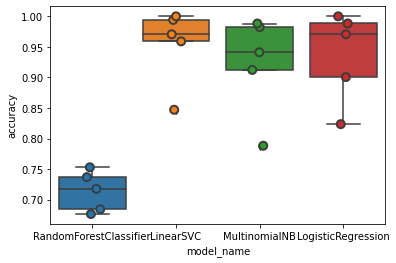

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

Accuracy de los cuatro modelos analizados.

In [373]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.954173
LogisticRegression        0.936601
MultinomialNB             0.922477
RandomForestClassifier    0.713622
Name: accuracy, dtype: float64

Ahora vamos a anlizar las sucategorías que no fueron correctamente predecidas en nuestro entrenamiento para realizar una mejora continua de nuestra bag of word.

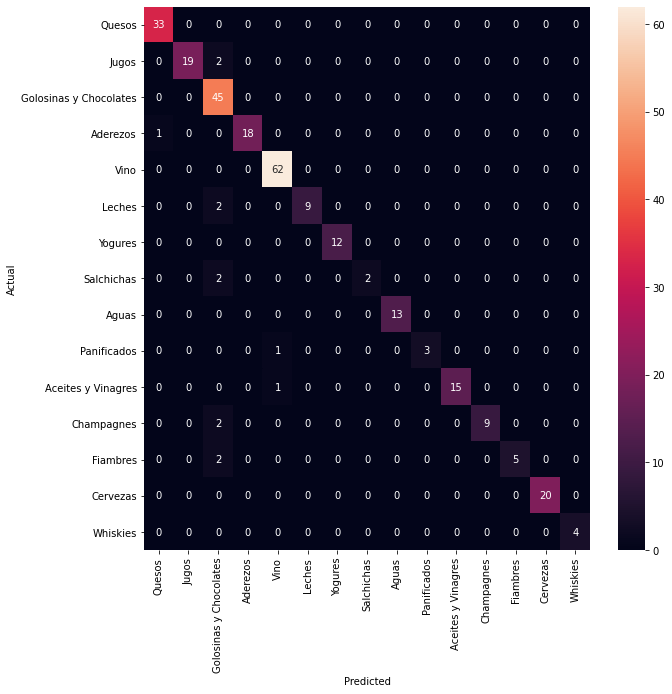

In [374]:
model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data_predict.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Subcategoria.values, yticklabels=category_id_df.Subcategoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Verificamos los productos que fueron mal clasificados en nuestro entrenamiento en >= 3 veces, luego con estos datos se procede a mejorar el bag of words

In [375]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(data_predict.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Producto2']])
      print('')

'Jugos' predicted as 'Golosinas y Chocolates' : 2 examples.


,Producto2
842,bebida lactea
841,bebida isotonica



'Leches' predicted as 'Golosinas y Chocolates' : 2 examples.


,Producto2
784,seremix licuado
783,seremix licuado



'Salchichas' predicted as 'Golosinas y Chocolates' : 2 examples.


,Producto2
843,salchicha piel
844,salchicha americana



'Champagnes' predicted as 'Golosinas y Chocolates' : 2 examples.


,Producto2
851,champagne dada
786,champa x



'Fiambres' predicted as 'Golosinas y Chocolates' : 2 examples.


,Producto2
548,panceta salada
848,bondiola feteada


En el caso de querer clasificar el archivo train_challenge.csv debemos renombrar la variable data1 a data y ejecutar todo el proceso, el mismo esta automatizado para que realice todo.